In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
movies_data = pd.read_csv("movies.csv")

In [5]:
movies_data.shape

(9742, 3)

In [24]:
ratings_data = pd.read_csv("ratings.csv")

In [7]:
rating_data.shape

(100836, 4)

In [16]:
len(rating_data["userId"].unique())

610

In [17]:
grouped_data = rating_data.groupby("movieId")

In [22]:
ratings_counts = grouped_data.size()

In [19]:
max_rated_movie_id = rating_counts.idxmax()

In [20]:
max_rated_movie_id

356

In [25]:
combined_data = movies_data.merge(ratings_data, on="movieId")

In [26]:
filtered_data = combined_data[(combined_data["title"] == "Terminator 2: Judgment Day (1991)")]

In [27]:
average_rating = filtered_data["rating"].mean()

In [28]:
average_rating

3.970982142857143

In [29]:
fight_club_data = combined_data[combined_data["title"] == "Fight Club (1999)"]

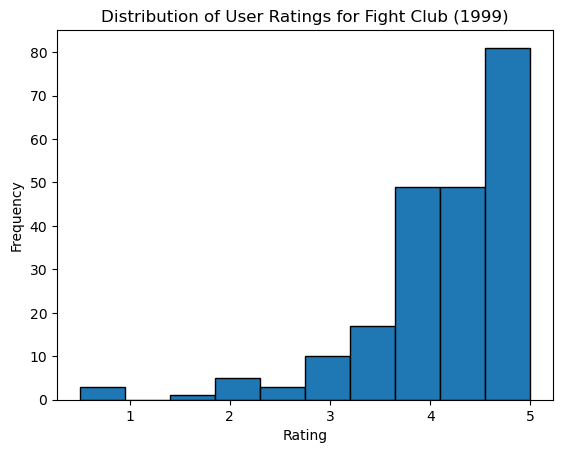

In [32]:
plt.hist(fight_club_data["rating"], bins=10, edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of User Ratings for Fight Club (1999)")
plt.show()

In [33]:
grouped_ratings = ratings_data.groupby("movieId").agg(count=("userId", "count"), mean_rating=("rating", "mean"))

In [34]:
combined_data = movies_data.merge(grouped_ratings, on="movieId")

In [35]:
filtered_data = combined_data[combined_data["count"] > 50]

In [36]:
print(filtered_data)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  count  mean_rating  
0     Adventure|Animation|Children|Comedy|Fantasy    215     3.920930  
1                      Adventure|Children|Fantasy    110     3.431818  
2                                  Comedy|Romance     52     3.259615  
5                           Action|Crime|Thriller    102     3.946078  
6                          

In [37]:
len(filtered_data)

436

In [38]:
filtered_data = filtered_data.sort_values(by="mean_rating", ascending=False)

In [39]:
most_popular_movie = filtered_data.iloc[0]

In [40]:
most_popular_movie

movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
count                                       317
mean_rating                            4.429022
Name: 277, dtype: object

In [41]:
filtered_data = filtered_data.sort_values(by="count", ascending=False)

In [42]:
top_5_movies = filtered_data.iloc[:5]

In [43]:
top_5_movies

,movieId,title,genres,count,mean_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [80]:
sci_fi_data = filtered_data[filtered_data["genres"].str.contains("Sci-Fi", case=False)]
third_most_popular_sci_fi = sci_fi_data.sort_values(by="count", ascending=False).iloc[0]
title = third_most_popular_sci_fi["title"]
count = third_most_popular_sci_fi["count"]
title

'Matrix, The (1999)'

In [77]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)  # Filled in with 'get'
    soup = BeautifulSoup(response.text, 'html.parser')  # Filled in with 'BeautifulSoup(response.text, 'html.parser')'
    imdb_rating = soup.find('strong', attrs={'itemprop': 'ratingValue'})  # Filled in with appropriate selectors
    return imdb_rating.text if imdb_rating else np.nan


In [78]:
links = pd.read_csv("links.csv")

links["imdb_rating"] = links["imdbId"].apply(scrapper)

highest_rated_movieId = links[links["imdb_rating"] == links["imdb_rating"].max()]["imdbId"].iloc[0]

print("MovieId with the highest IMDb rating:", highest_rated_movieId)

KeyboardInterrupt: 